#Rizki Muhammad Syamsi
#50422047
#4IA21

## **1) Importing Python Packages for GAN**


In [ ]:
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import Dropout
from keras.layers import LeakyReLU # Corrected import
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
!mkdir generated_images

mkdir: cannot create directory ‘generated_images’: File exists


Pertama-tama, saya mengimpor pustaka yang diperlukan untuk membangun Generative Adversarial Network (GAN) dan juga membuat direktori untuk menyimpan gambar yang dihasilkan selama proses pelatihan.

Saya menggunakan:

from keras.datasets import cifar10, mnist untuk mengambil dataset CIFAR10 dan MNIST yang umum digunakan dalam pembuatan gambar.

from keras.models import Sequential untuk menggunakan model berjenis Sequential sebagai kerangka utama jaringan saya.

from keras.layers ... untuk mengimpor berbagai lapisan seperti Dense, Flatten, Conv2D, Conv2DTranspose, Dropout, dan LeakyReLU yang akan saya gunakan baik di generator maupun diskriminator.

from tensorflow.keras.optimizers import Adam untuk mengimpor optimizer Adam, karena algoritma ini sangat populer dan efisien untuk melatih jaringan saraf.

import numpy as np untuk operasi numerik, dan import matplotlib.pyplot as plt untuk memvisualisasikan hasil gambar yang dihasilkan.
Terakhir, saya membuat folder bernama generated_images dengan perintah !mkdir generated_images sebagai tempat menyimpan gambar hasil generator selama pelatihan.

## **2) Parameters for Neural Networks & Data**

In [ ]:
img_width = 32
img_height = 32
channels = 3
img_shape = (img_width, img_height, channels)
latent_dim = 100
adam = Adam(learning_rate=0.0002)

Selanjutnya, saya menentukan beberapa parameter penting yang akan digunakan dalam membangun dan melatih jaringan GAN.

Saya menetapkan ukuran gambar (img_width = 32, img_height = 32) serta jumlah saluran warna (channels = 3) karena saya menggunakan gambar berwarna RGB.
Kemudian, saya membuat tuple img_shape = (img_width, img_height, channels) untuk mendefinisikan bentuk input gambar.

Saya juga menentukan dimensi ruang laten (latent_dim = 100), yang merupakan ruang tempat saya mengambil sampel noise untuk menghasilkan gambar baru.
Untuk proses optimasi, saya menggunakan optimizer Adam dengan learning_rate=0.0002.

## **3) Building Generator**





In [ ]:
def build_generator():
    model = Sequential()

    # Create first layer, to receive the input
    model.add(Dense(256 * 4 * 4, input_dim = latent_dim))
    # 256 * 8 * 8; for upscaling the layers,
    # initial shape to construct into final shape

    # Create default activation function
    model.add(LeakyReLU(alpha = 0.2))

    # Create reshape layer
    model.add(Reshape((4, 4,256)))
    # 8,8,256 ; reffers to first layer

    # Adding more layers for neurons and better result
    model.add(Conv2DTranspose(128, (4,4), strides = (2,2), padding = 'same'))
    model.add(LeakyReLU(alpha= 0.2))
    model.add(Conv2DTranspose(128, (4,4), strides = (2,2), padding = 'same'))
    model.add(LeakyReLU(alpha= 0.2))
    model.add(Conv2DTranspose(128, (4,4), strides = (2,2), padding = 'asame'))
    model.add(LeakyReLU(alpha= 0.2))
    # (4,4) >> filter size
    # strides = (2,2) >> Convolutional layers, that how NN understand images

    # Create Final output layer and forming image shape
    # the shape (3, (3,3)) reffers to image shape :
    #    >>>  img_shape = (img_width, img_height, channels)
    model.add(Conv2D(3, (3,3), activation= 'tanh', padding = 'same'))

    #
    model.summary()
    return model

generator = build_generator()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 4096)           │       413,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_16 (LeakyReLU)      │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_6              │ (None, 8, 8, 128)      │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_17 (LeakyReLU)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_7              │ (None, 16, 16, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_18 (LeakyReLU)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_8              │ (None, 32, 32, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_19 (LeakyReLU)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 3)      │         3,459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,466,115 (5.59 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 0 (0.00 B)

Setelah itu, saya mendefinisikan fungsi build_generator untuk membangun model generator.
Generator ini saya bangun menggunakan model Sequential. Saya memulai dengan lapisan Dense pertama yang menerima input dari ruang laten berdimensi 100, lalu saya bentuk ulang (reshape) output menjadi tensor 3D yang menjadi representasi awal gambar.

Kemudian, saya menambahkan beberapa lapisan Conv2DTranspose dengan fungsi aktivasi LeakyReLU. Lapisan-lapisan ini membantu memperbesar dimensi spasial (resolusi) hingga membentuk gambar berukuran 32x32 piksel.

Terakhir, saya menambahkan lapisan Conv2D dengan tiga filter (untuk RGB) dan aktivasi ‘tanh’ agar hasilnya berada pada rentang -1 sampai 1.
Setelah mencetak ringkasan model dengan model.summary(), saya memanggil fungsi ini untuk membuat instance generator.

## **4) Building Discriminator**

In [ ]:
def build_discriminator():
    model = Sequential()

    # Create input layer and filter and stride layer. That makes NN understand image
    model.add(Conv2D(64, (3,3), padding = 'same', input_shape = img_shape))

    # Adding activation function
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Conv2D(128, (3,3), padding = 'same'))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Conv2D(128, (3,3), padding = 'same'))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Conv2D(256, (3,3), padding = 'same'))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Flatten())

    model.add(Dropout(0.4))

    # Create output layer
    model.add(Dense(1, activation = 'sigmoid'))

    model.summary()
    return model

discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_20 (LeakyReLU)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_21 (LeakyReLU)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_22 (LeakyReLU)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_23 (LeakyReLU)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 262144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 262144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │       262,145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 780,545 (2.98 MB)

 Trainable params: 780,545 (2.98 MB)

 Non-trainable params: 0 (0.00 B)

Berikutnya, saya mendefinisikan fungsi build_discriminator untuk membangun model diskriminator yang bertugas membedakan antara gambar asli dan gambar palsu.

Saya menggunakan beberapa lapisan Conv2D dengan jumlah filter yang meningkat (64, 128, 128, 256) untuk mengekstraksi fitur dari gambar.
Setiap lapisan konvolusi saya ikuti dengan aktivasi LeakyReLU agar jaringan lebih stabil dalam belajar.

Setelah fitur terekstraksi, saya meratakan output dengan Flatten() lalu menambahkan Dropout(0.4) untuk mencegah overfitting.
Lapisan terakhir saya buat berupa Dense(1, activation='sigmoid'), yang memberikan output probabilitas antara 0 (palsu) dan 1 (asli).

## **5) Connecting Neural Networks to build GAN**

In [ ]:
GAN = Sequential()
discriminator.trainable = False
GAN.add(generator)
GAN.add(discriminator)

GAN.compile(loss='binary_crossentropy', optimizer=adam)

In [ ]:
GAN.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (None, 32, 32, 3)      │     1,466,115 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_7 (Sequential)       │ (None, 1)              │       780,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,246,660 (8.57 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 780,545 (2.98 MB)

In [ ]:
GAN = Sequential()
discriminator.trainable = False
GAN.add(generator)
GAN.add(discriminator)

GAN.compile(loss='binary_crossentropy', optimizer=adam)

Setelah kedua model siap, saya menggabungkannya untuk membentuk model GAN.
Saya membuat model Sequential baru bernama GAN, kemudian saya mengatur agar diskriminator tidak dapat dilatih dengan discriminator.trainable = False.
Hal ini penting agar saat saya melatih generator, bobot diskriminator tidak ikut berubah.

In [ ]:
GAN.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (None, 32, 32, 3)      │     1,466,115 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_7 (Sequential)       │ (None, 1)              │       780,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,246,660 (8.57 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 780,545 (2.98 MB)

## **6) Outputting Images**


In [ ]:
def save_images(epoch, generator, latent_dim):
    noise = np.random.normal(size=[16, latent_dim])
    generated_images = generator.predict(noise)

    # Rescale images to be between 0 and 1
    generated_images = 0.5 * generated_images + 0.5

    fig, axs = plt.subplots(4, 4, figsize=(10, 10))
    count = 0
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(generated_images[count])
            axs[i, j].axis('off')
            count += 1
    plt.savefig(f"generated_images/gan_epoch_{epoch}.png")
    plt.close()

Untuk memantau hasil pelatihan, saya membuat fungsi save_images.
Fungsi ini menghasilkan 16 gambar menggunakan generator, lalu menampilkannya dalam grid 4x4 dengan bantuan Matplotlib.
Sebelum ditampilkan, saya melakukan rescaling nilai piksel dari rentang -1–1 menjadi 0–1 agar bisa divisualisasikan dengan baik.

Gambar hasilnya saya simpan ke folder generated_images dengan nama file berdasarkan nomor epoch, misalnya gan_epoch_100.png.

## **7) Training GAN**

In [ ]:
def train_gan(epochs, batch_size, save_interval):
    # Load data
    (X_train, _), (_, _) = cifar10.load_data()

    # Rescale images to -1 to 1
    X_train = X_train / 127.5 - 1.
    X_train = np.expand_dims(X_train, axis=3) if len(X_train.shape) < 4 else X_train # Ensure 4 dimensions

    # Adversarial ground truths
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        # ---------------------
        #  Train Discriminator
        # ---------------------

        # Select a random batch of images
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        generated_images = generator.predict(noise)

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(imgs, valid)
        d_loss_fake = discriminator.train_on_batch(generated_images, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train Generator
        # ---------------------

        noise = np.random.normal(0, 1, (batch_size, latent_dim))

        # Train the generator
        g_loss = GAN.train_on_batch(noise, valid)

        # Plot the progress
        print(f"Epoch {epoch} [D loss: {d_loss[0]} | D accuracy: {100*d_loss[1]:.2f}%] [G loss: {g_loss}]")

        # If at save interval => save generated images
        if epoch % save_interval == 0:
            save_images(epoch, generator, latent_dim)

Terakhir, saya membuat fungsi train_gan untuk melatih keseluruhan model.
Saya memuat dataset CIFAR10, lalu menormalkan nilai pikselnya menjadi -1 hingga 1.

Selama pelatihan:

Saya pertama-tama melatih diskriminator menggunakan batch gambar asli (label 1) dan gambar palsu hasil generator (label 0).

Lalu saya melatih generator dengan cara memberikan noise acak dan target label “asli”. Tujuannya agar generator belajar menghasilkan gambar yang bisa menipu diskriminator.

Saya juga mencetak hasil setiap epoch — berupa loss dan accuracy dari diskriminator serta loss dari generator — untuk memantau performa pelatihan.
Setiap beberapa epoch, saya memanggil fungsi save_images agar saya bisa melihat perkembangan kualitas gambar yang dihasilkan seiring waktu.

### **8) Making GIF**

In [ ]:
!pip install imageio imageio-ffmpeg

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Epoch 0 [D loss: 0.9359854459762573 | D accuracy: 43.01%] [G loss: 0.3778737783432007]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Epoch 1 [D loss: 0.9366998672485352 | D accuracy: 43.02%] [G loss: 0.37722262740135193]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Epoch 2 [D loss: 0.9373815655708313 | D accuracy: 43.04%] [G loss: 0.3765954375267029]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Epoch 3 [D loss: 0.9380879402160645 | D accuracy: 43.06%] [G loss: 0.3759397566318512]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Epoch 4 [D loss: 0.9388111233711243 | D accuracy: 43.06%] [G loss: 0.3753068745136261]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Epoch 5 [D loss: 0.9395051598548889 | D accuracy: 43.04%] [G loss: 0.37469443678855896]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Epoch 6 [D loss: 0.9402208924293518 | D accuracy: 43.03%] [G loss: 0.37408190965652466]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Epoch 7 [D loss: 0.9409170150756836 | D accura

/tmp/ipython-input-1424021826.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


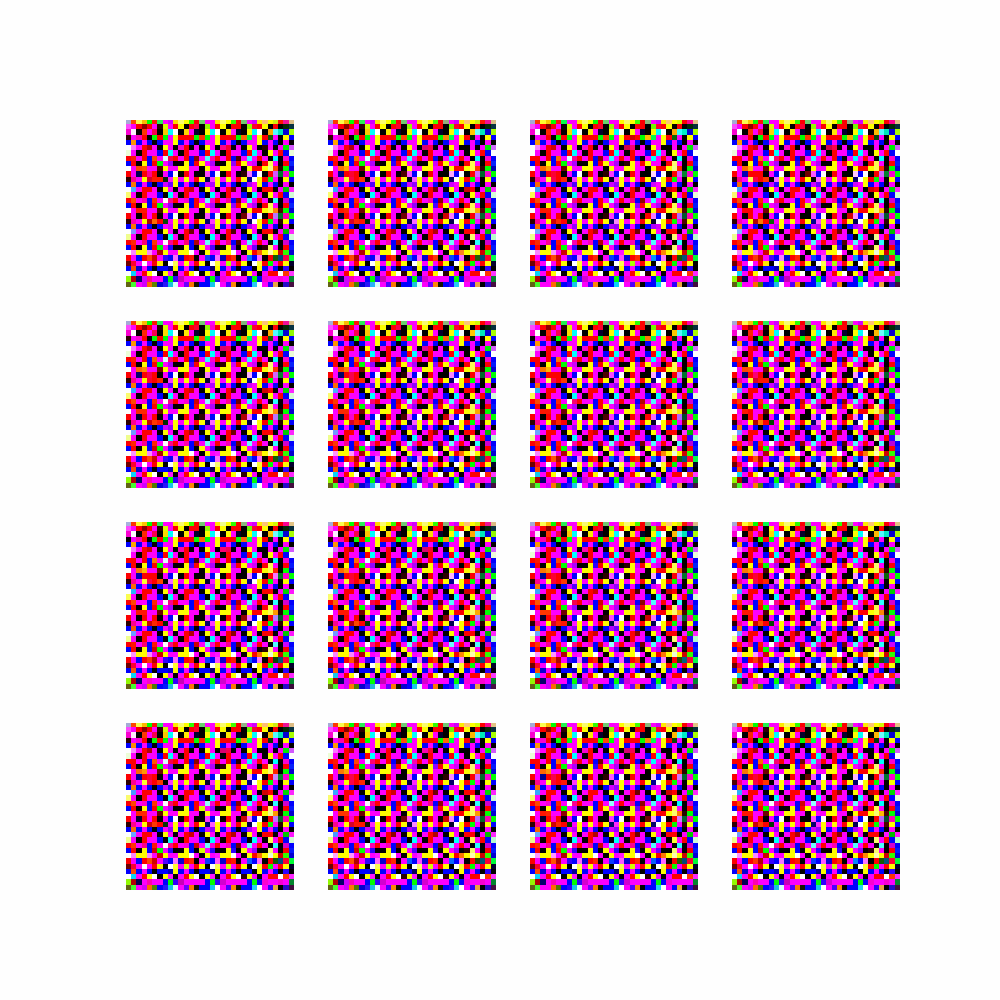

In [ ]:
epochs = 10
batch_size = 32
save_interval = 1000

train_gan(epochs, batch_size, save_interval)

gif_path = create_gif(epochs)
print(f"Created GIF: {gif_path}")

# To display the GIF in Colab:
from IPython.display import Image
Image(filename=gif_path)